# A semi-practical demonstration of expansions using Fourier and Legendre basis functions

This is a demonstration of the expansion of the Dirac delta function. 
This is based off of example 5.1.7 in the 7th edition of  Arfken's __Mathematical Methods for Physicists__. 
It shows $\delta(x-t)$ expanded in the complete orthonormal Hilbert space where the unit vectors are  
$\phi_n(x)=\sqrt{2}\sin(n \pi x)$  
and the inner product is  
$< f | g > = \int\limits_0^1 f(x)g(x) dx$ .  
In other words, this notebook shows the Fourier expansion of $\delta(x-0.4)$.

Arfken introduces the expansion of the delta function in a weird way. He states that  
$\delta(x-t) = \sum \phi_n^*(t) \phi_n(x)$  
and then shows that it does, in fact, match the definition of the delta function. 

I really don't like this, since it makes the expansion seem magical. I think it makes much more sense to just _find_ the expansion the way you would with any other function. 

So, in the $x$ domain:  
$\delta(x-t) = \delta(x-t)$.

We can find the $\phi$ expansion of $\delta$ just like we would with any function:  
$\delta(x-t) = \sum_n \left< \phi_n(x) \, | \, \delta(x-t) \right> \phi_n(x)$  

We can then expand that bra-ket to figure out the form of $\delta$ in the $\phi$ space. If we're using the usual definition for the inner product:  
$\left< \phi_n(x) \, | \, \delta(x-t) \right> = \int \phi_n^*(x) \delta(x-t) \, dx$  
$ = \phi_n^*(t)$

So, the expansion of $\delta(x-t)$ must be:  
$\delta(x-t) = \sum \phi_n^*(t)\phi_n(x)$

It's important to note that this depends on the "usual" definition of the inner product. If we had something _other than_ $\left< f | g \right> = \int f(x) g(x) \, dx$, then this would not be the correct expansion for $\delta(x-t)$. 

#### Configuration and version

Obviously you will need to install the `animation` package to run this locally.
If the `png()` function works for you, then you don't need to install `Cairo`.
(Just comment out the `library()` call and animation configuration.) 

In [1]:
library('animation') # for making GIFs
library('Cairo') # only needed on machines with broken PNG support
ani.options(ani.dev= 'CairoPNG') # only needed on machines with broken PNG support
R.Version()$vers

[1] "R version 3.2.5 (2016-04-14)"

### Define the basis functions and the expansion of $\delta$.

Arfken uses the Fourier expansion of $\delta(x-0.4)$ on the interval $[0,1]$ as his example. This is that.

... Well, this is that plus some other stuff too.

In [2]:
# Given a number of terms and value for t, return a single-input approximaion for delta.
# Have it feed in x values one at a time, to avoid weirdness between x and n in sum().
mkf.delta <- function(N=50, t=0.4, n=1:N) 
    function(x) sapply(x, function(x) sum(phi(t,n)*phi(x,n))) 
        
# Heaviside step function
step <- function(x)
    sapply(x, function(x) if (x>0) 1 else if (x==0) 0.5 else 0)

# Take a vector and a function. Return the sum of the function, using the vector as inputs.
sumover <- function(ind, FUN) 
{# forgive me, I am weak...
    value <- 0
    for (i in ind)
        value <- value+FUN(i)
    return(value)
}
# sumover <- function(ind, FUN) sum(sapply(ind, FUN))

# take a function, a vector of term indices, and a basis. Return the indexed 
# coefficients of that function expanded into that basis.
expand <- function(FUN,n=1:10,phi)
    sapply(n, function(n) integrate(function(t) FUN(t)*phi(t,n), lower=0, upper=1)$value)

# Take some expansion coefficients and a basis. Return the single-input function
# represented by those coefficients.
unexpand <- function(coeff, phi)
    function(x) sumover(1:length(coeff), function(n) coeff[n]*phi(x,n)) 

# a cute wrapper to approximate a function using expansions:
approximate <- function(FUN, N=50, n=1:N, phi)
    unexpand(expand(FUN, n=n, phi), phi)

# Take a function and return a function generator in the style of mkf.delta.
# Aka, return a function which:
        # takes a number of terms, an offset, and a vector of terms and
        # reutrns a single-input function.
# mkfize <- function(FUN) function(N=50, t=0.4, n=1:N)
#    function(x) sapply(x, unexpand(expand(FUN, n=n, phi), phi)(x))
mkfize <- function(FUN) function(N=50, t=0.4, n=1:N)
    approximate(function(x) FUN(x-t), N=N, n=n, phi=phi)
mkf <- mkfize(step)

# f <- expand(function(x) step(x-3/4), 1:100, fourier)
# plot(unexpand(f, fourier))


#### Fourier basis functions

In [3]:
fourier <- function(x, n) sqrt(2)*sin(n*pi*x)

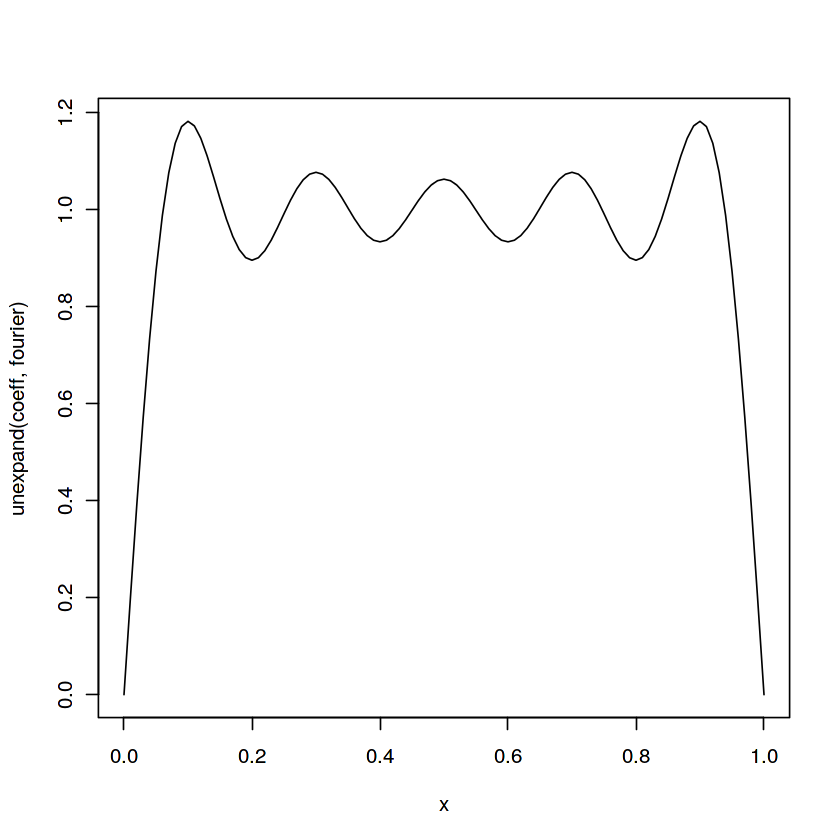

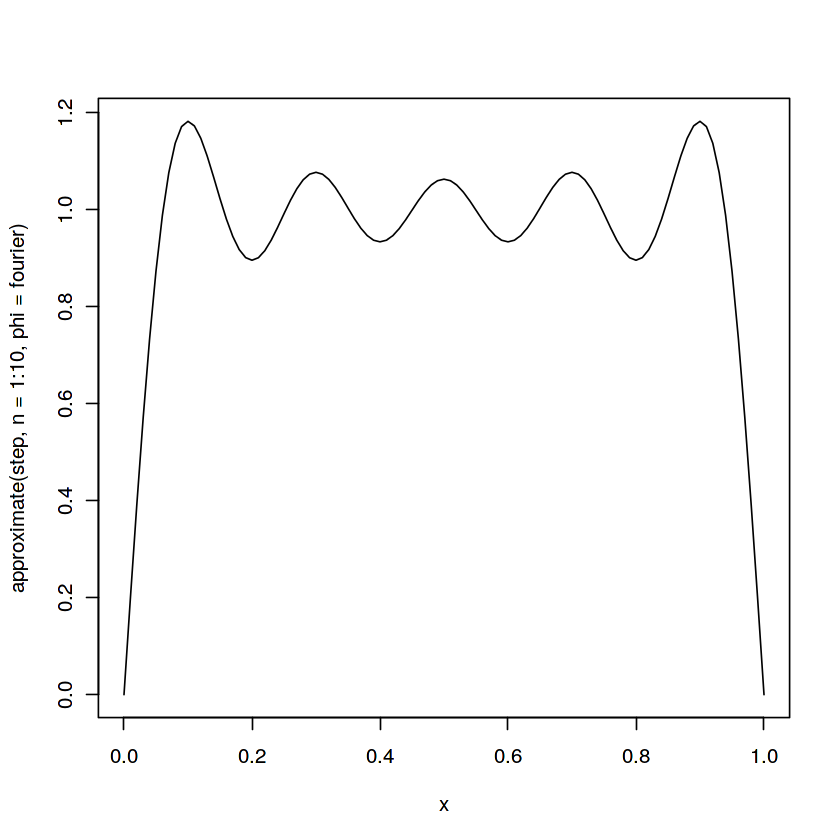

In [4]:
coeff <- expand(step, phi=fourier)
plot(unexpand(coeff, fourier))
plot(approximate(step, n=1:10, phi=fourier))

#### Legendre basis functions
Lol, compare this to the one-liner for Fourier.

In [5]:
legendre <- function(x,n) sapply(n, function(n) 
    2^n*sumover(0:n, function(k) x^k*choose(n,k)*choose((n+k-1)/2,n)))
# You can check that legendre() works by trying some values of n.
# It should always be inside the range [-1,1] in both x and y, and even/odd 
# values of n should correspond to even/odd functions.
# plot(function(x) legendre(x,7), xlim=c(-1,1))

### Make a GIFs of the better approximations as more terms are brought in.

#### define how to make the GIFs

In [6]:
# 0.05 seconds between frames of the GIF:
ani.options(interval=0.05)
mkgif <- function() {
    saveGIF(movie.name = gifname, expr = {
        I.hist <- NULL # to show how the approximation improves
        # upper/lower split plot:
        layout(matrix(c(1,2,3), nrow=3), heights = c(3,1,1))
        par.old <- par()
        for (i in 1:length(N.vals))
        {
            #cat('i is ', i)
            par(mar=c(5,5,4,2))
            plot(
                mkf(n=N.vals[1:i]), type='l', n= 1e3,
                # main=expression(delta == sum(paste(phi[n],"*")(t)*phi[n](x)))
                main= plottitle,
                ylab= expression(delta(x-t))
                )
            abline(h=0, v=0.4, col='green')
            legend('topright', legend=paste('N=', i))
            I= integrate(f = mkf(n=N.vals[1:i]), lower = 0, upper = 1, subdivisions=1e3)
    # 		cat(I$value, '\n')
            I.hist <- c(I.hist, I$value)
            par(mar=c(0,5,0,2))
            plot(
                I.hist, 
                xlab='N', ylab=expression(integral(delta(x-t))), 
                type='l', xlim=c(1,length(N.vals)), 
                xaxt='n'
            )
            abline(h=1, col='green')
            
            par(mar=c(5,5,0,2))
            plot(
                N.vals[1:i], 
                xlim=c(1,length(N.vals)), ylim=range(N.vals),
                ylab= 'term'
            )
        }
        # return plotting to normal:
        layout(1)
        par(par.old)
    })
}

#### How it's usually shown

Basically, as you use more and more terms to approximate $\delta$, the approximation looks better and better. You can also take the integral of the approximation to gauge how close it is. 

Warning: These plots may take a long time to render, if you decide to run this code yourself!

In [7]:
mkf.delta

function(N=50, t=0.4, n=1:N) 
    function(x) sapply(x, function(x) sum(phi(t,n)*phi(x,n)))

In [8]:
mkf

function(N=50, t=0.4, n=1:N)
    approximate(function(x) FUN(x-t), N=N, n=n, phi=phi)
<environment: 0x320c5c8>

In [9]:
phi <- fourier
gifname <- 'diracDeltaExpansion.gif'
plottitle <- 'low-frequency terms first'
N.vals <- 1:200 # range of expansion sizes to show
mkgif()

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    Rplot41.png Rpl

[1] TRUE

![](diracDeltaExpansion.gif)

#### Adding the basis functions in reverse order

Okay, so that's pretty neat. It also looks how you'd expect if you've ever been shown a plot of a Fourier approximation. It more or less has the shape of the function, with some high-frequency junk thrown in, the sharp edges are extra wiggly, and adding more high-frequency terms get you closer to the function. 

But, what if we don't start with the low-frequency terms and then add the high-frequency terms? What if we start with the higher terms and then add the low ones?

This code approximates $\delta(x-0.4)$, but adds in the terms in reverse order, relative to the last plot. So, it starts out with $\sqrt{2}\sin(200 \pi x)$ and then becomes $\sqrt{2}\sin(200 \pi x) + \sqrt{2}\sin(199 \pi x)$ and so on. 

In [10]:
gifname <- 'diracDeltaReverseExpansion.gif'
plottitle <- 'high-frequency terms first'
N.vals <- rev(N.vals)
mkgif()

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    Rplot41.png Rpl

[1] TRUE

![](diracDeltaReverseExpansion.gif)

It's kind of neat how the expected integral ($\int\delta(x-t)\,dx=1$) doesn't really approximate the expected value until the last term is added. It makes sense, since the last term contributes the most to the integral. It's also kind of neat how the terms really only flip the integral around zero until the last term. 

#### Add terms randomly

This one just goes crazy and shuffles the order in which the terms 1 through 200 are used. 

In [11]:
gifname <- 'diracDeltaRandomExpansion.gif'
plottitle <- 'randomly add terms from terms 1 through 200'
N.vals <- sample(N.vals)
mkgif()

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    Rplot41.png Rpl

[1] TRUE

![](diracDeltaRandomExpansion.gif)

#### Even terms only

It might also be interesting to plot only the even or odd terms, since only the odd terms contribute to the integral.

In [12]:
gifname <- 'diracDeltaEvenExpansion.gif'
plottitle <- 'even terms only'
N.vals <- (1:200)[2*1:100]
mkgif()

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    Rplot41.png Rpl

[1] TRUE

![](diracDeltaEvenExpansion.gif)

I suppose it makes sense that there would be an oddly reflected peak on the other side of $x=0.5$, since all the even terms have odd symmetry about that point. 
And of course, the value of the integral just seems to be rounding error, since the even terms don't contribute anything to the integral.

I'm not sure what the deal is with the oscillations between the peaks though.

#### Odd terms only

In [13]:
gifname <- 'diracDeltaOddExpansion.gif'
plottitle <- 'odd terms only'
N.vals <- N.vals-1
mkgif()

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    Rplot41.png Rpl

[1] TRUE

![](diracDeltaOddExpansion.gif)

The even-symmetrical peaks make sense for similar reasons as the last plot. All the odd terms have even symmetry about the middle. And the value of the integral closely approximates 1, since the odd terms are the only ones that contribute to it. 

### Same thing using Legendre polynomials

##### fails

In [14]:
# legendre.helper <- function(x,n)
# { # easy-to-write but _very_ inefficient recursive definition
#     if (n==0) rep(1, length(x))
#     else if (n==1) x
#     else (2*n-1)/n*x*legendre(x,n-1) - (n-1)/n*legendre(x,n-2)
#     # I think this function scales like O(2^n), lol...
# }
# legendre <- function(x,n) sapply(n, function(n) legendre.helper(x,n))
# legendre <- function(x,n) 
#     sapply(x, function(x)
#         2^n*sum(
#                 sapply(0:n, function(k) x^k*choose(n,k)*choose((n+k-1)/2, n))
#             )
#     )
# legendre <- function(x,n) sapply(x, function(x)
# {
#     ret <- NULL
#     for (i in n)
#     {
#         tot <- 0
#         for (k in 0:i)
#             tot <- tot+( x^k*choose(n,k)*choose((n+k-1)/2, n)) 
#         ret <- c(ret, 2^n*tot)
#     }
#             
# })

# sumover <- function(name, ind, expr) 
# {
#     value <- 0
#     for (i in ind)
#         parms <- list(ind)
#         names(parms) <- name
#         with(parms, expr)
# #        value <- value+with(parms, expr)
# #    return(value)
# }

#### plot the Legendre expansion

In [15]:
phi <- legendre
gifname <- 'diracDeltaLegendreExpansion.gif'
plottitle <- expression(paste(delta(x-0.4), 'approximation by Legendre expansion'))
N.vals <- 1:40
system.time(mkgif())

Warning message in par(par.old):
"graphical parameter "cin" cannot be set"Warning message in par(par.old):
"graphical parameter "cra" cannot be set"Warning message in par(par.old):
"graphical parameter "csi" cannot be set"Warning message in par(par.old):
"graphical parameter "cxy" cannot be set"Warning message in par(par.old):
"graphical parameter "din" cannot be set"Warning message in par(par.old):
"graphical parameter "page" cannot be set"Executing: 
convert -loop 0 -delay 5 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png Rplot13.png Rplot14.png Rplot15.png
    Rplot16.png Rplot17.png Rplot18.png Rplot19.png Rplot20.png
    Rplot21.png Rplot22.png Rplot23.png Rplot24.png Rplot25.png
    Rplot26.png Rplot27.png Rplot28.png Rplot29.png Rplot30.png
    Rplot31.png Rplot32.png Rplot33.png Rplot34.png Rplot35.png
    Rplot36.png Rplot37.png Rplot38.png Rplot39.png Rplot40.png
    'diracDeltaLege

   user  system elapsed 
 16.850   2.532  19.242 

In [16]:
# Check that legendre() works. (Try values of n.)
# It should always be inside the range [-1,1] in both x and y, and even/odd 
# values of n should correspond to even/odd functions.
# plot(function(x) legendre(x,7), xlim=c(-1,1))

![](diracDeltaLegendreExpansion.gif)

Well would you look at that, math really does work!

Also, I totally see why we don't use Legendre expansions in numerical stuff. It totally sucks. It takes _way_ more time and terms to get the same quality of approximation. To be fair, the way I wrote it, the Legendre approximation has two extra loops in it, relative to the Fourier version (one for `sapply()` and one for `sumover()`). _But_, the Legendre functions also have _two_ combinatorial functions in them... So, I'm pretty sure it's those factorials that are taking so much time.

That's pretty cool though, that we're completely out of the nice, familiar realm of Fourier analysis and into some other weirdo basis functions. It's nice to see these Hilbert space shenanigans demonstrated with something that _isn't Fourier_.